In [86]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import sklearn
from sklearn import preprocessing
%matplotlib inline

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows', 100)

In [87]:
with open('data_pickled.pkl','rb') as f:
    data = pickle.load(f)

# EDA Stuff

Median : 25.0
Mean : 25.12
SD : 4.67


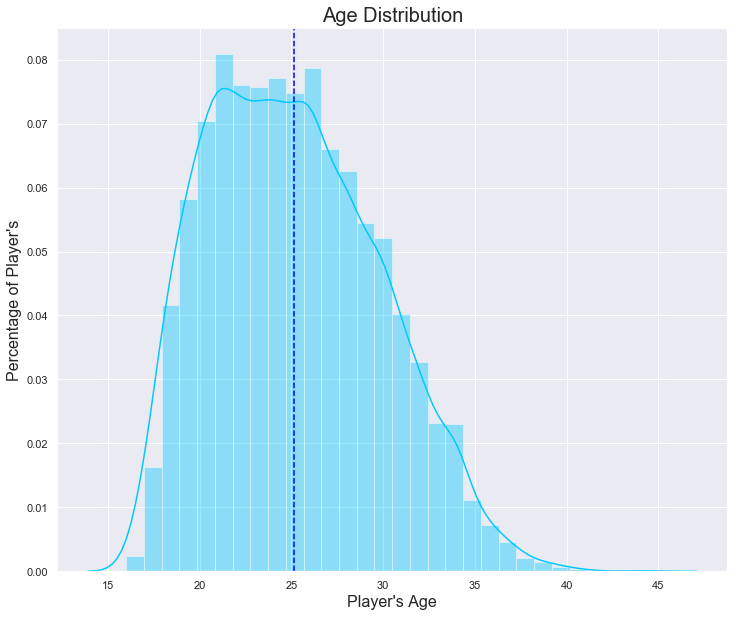

In [88]:
x = data['Age']
sns.set(rc={'figure.figsize':(12,10)})
ax = sns.distplot(x,bins =30, color = '#00C9FF')
ax.set_xlabel(xlabel="Player's Age", fontsize=16)
ax.set_ylabel(ylabel="Percentage of Player's", fontsize=16)
ax.set_title(label="Age Distribution", fontsize=20)

mean = data['Age'].mean()
plt.axvline(mean,0,1,color='blue', linestyle='--')

print("Median :",round(data['Age'].median(),2) )
print("Mean :",round(data['Age'].mean(),2) )
print("SD :",round(data['Age'].std(),2) )




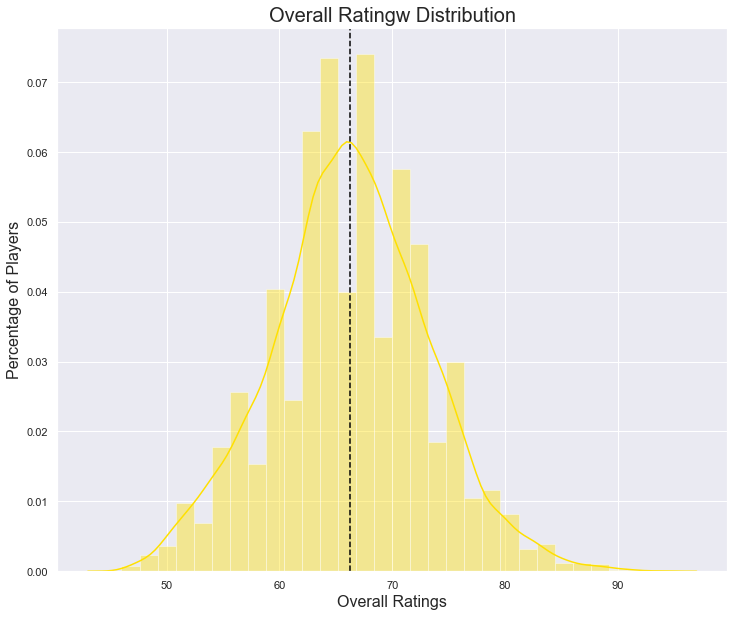

In [89]:
sns.set(rc={'figure.figsize':(12,10)})
ax = sns.distplot(data['Overall'], bins = 30, color="#FFE000")
ax.set_xlabel(xlabel="Overall Ratings", fontsize = 16)
ax.set_ylabel(ylabel='Percentage of Players', fontsize=16)
ax.set_title(label="Overall Ratingw Distribution", fontsize=20)

plt.axvline(data['Overall'].mean(), color='black', linestyle='--')

In [90]:
age_overall = pd.DataFrame(data.groupby(pd.qcut(data['Age'], 5)).mean()[['Overall', 'Potential']])
age_overall['Age'] = ['16-21', '21-23', '23-26', '26-29', '29+']
age_overall

,Overall,Potential,Age
Age,,,
"(15.999, 21.0]",60.819831,73.236287,16-21
"(21.0, 23.0]",65.628378,72.698198,21-23
"(23.0, 26.0]",67.957273,71.197333,23-26
"(26.0, 29.0]",69.147837,69.534080,26-29
"(29.0, 45.0]",69.447753,69.448898,29+


,Overall,Potential
Age,,
16-21,60.82,73.24
21-23,65.63,72.70
23-26,67.96,71.20
26-29,69.15,69.53
29+,69.45,69.45


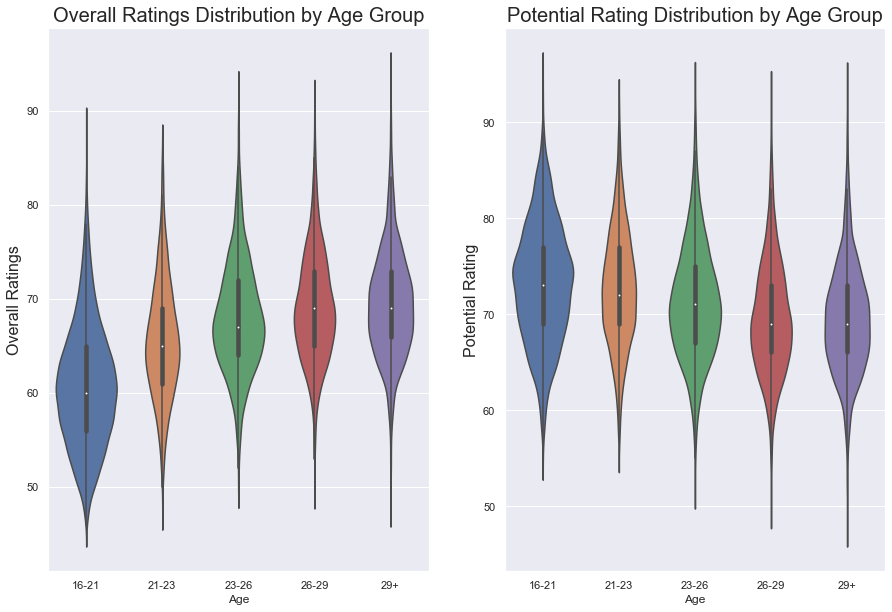

In [91]:
fig,ax =plt.subplots(nrows=1,ncols=2, figsize=(15,10))
sns.violinplot(x=pd.qcut(data['Age'],5),y=data['Overall'], data=data, inner='box', scale='count', ax=ax[0])
ax[0].set_xticklabels(['16-21', '21-23', '23-26', '26-29', '29+'])
ax[0].set_ylabel('Overall Ratings', fontsize=16)
ax[0].set_title('Overall Ratings Distribution by Age Group', fontsize =20)

sns.violinplot(x=pd.qcut(data['Age'],5),y=data['Potential'], data=data, inner='box', scale='count', ax=ax[1])
ax[1].set_xticklabels(['16-21', '21-23', '23-26', '26-29', '29+'])
ax[1].set_ylabel('Potential Rating', fontsize=16)
ax[1].set_title('Potential Rating Distribution by Age Group', fontsize =20)


display(age_overall.round(2).set_index('Age'))



Text(0.5, 1.0, 'Overall Distribution by Continent')

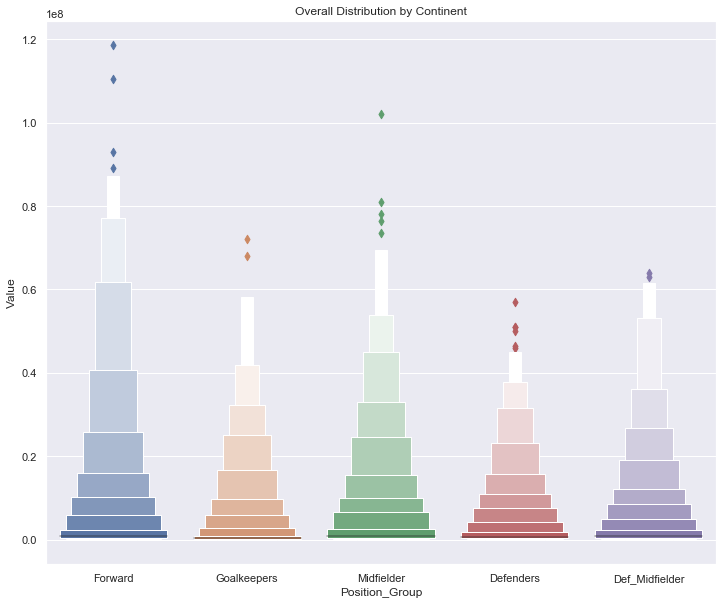

In [92]:
plt.figure(figsize = (12,10))
ax = sns.boxenplot(x= 'Position_Group', y= 'Value', data = data, scale = 'linear')
ax.set_title('Overall Distribution by Continent')

Text(0.5, 0.98, 'Age vs. Overall Distributions')

<Figure size 864x720 with 0 Axes>

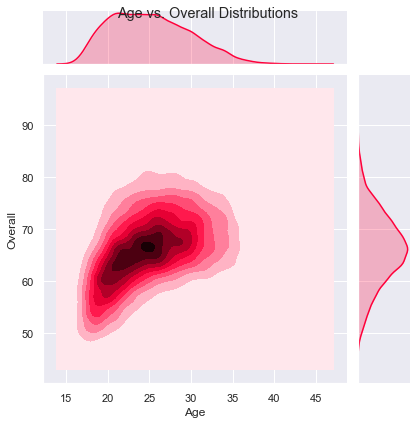

In [93]:
# Age vs Overall rating Jointplot

plt.figure(figsize = (12,10))

ax =sns.jointplot(x= 'Age', y = 'Overall', data=data,
              kind="kde", color="#FF003A")
ax.fig.suptitle('Age vs. Overall Distributions')


Value/Overall Correlation: 0.63


<Figure size 864x720 with 0 Axes>

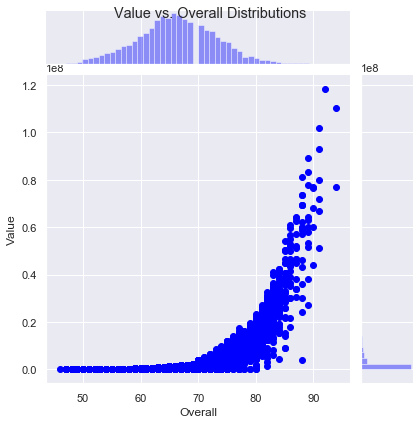

In [94]:
plt.figure(figsize= (12,10))
ax = sns.jointplot(x='Overall', y='Value', data=data, kind="scatter", color="blue")
ax.fig.suptitle('Value vs. Overall Distributions')

print("Value/Overall Correlation:",round(data.Value.corr(data.Overall),2))

,Wage
Position_Group,
Def_Midfielder,10233.50
Defenders,9146.10
Forward,11718.26
Goalkeepers,6763.87
Midfielder,10166.51


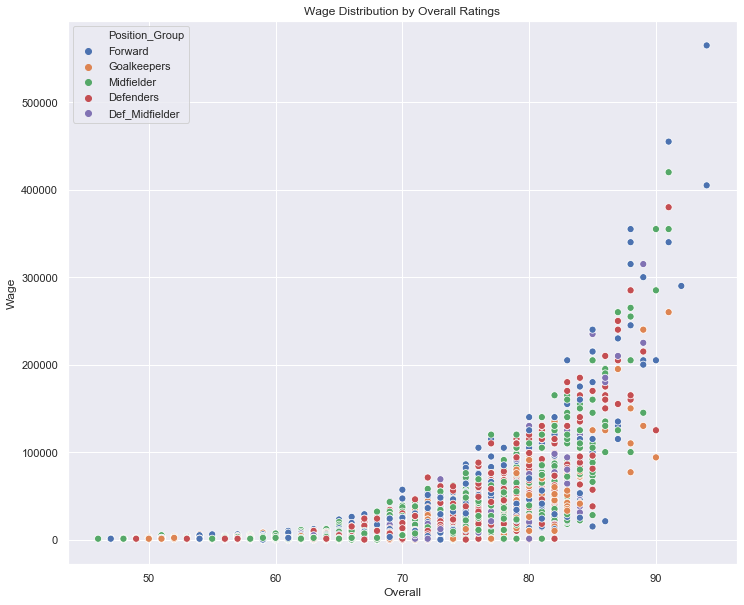

In [95]:
plt.figure(figsize=(12,10))
ax = sns.scatterplot(x='Overall',y='Wage',data=data, hue='Position_Group', s=50)
ax.set_xlabel(xlabel='Overall')
ax.set_ylabel(ylabel='Wage')
ax.set_title(label='Wage Distribution by Overall Ratings')

wage = pd.DataFrame(data.groupby('Position_Group').mean()['Wage'])
display(wage.round(2))

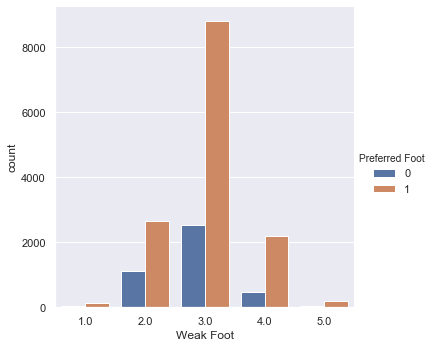

In [96]:
# Countplot for weak foot ratings
sns.catplot(x = 'Weak Foot', hue = 'Preferred Foot' ,kind = 'count', data = data)

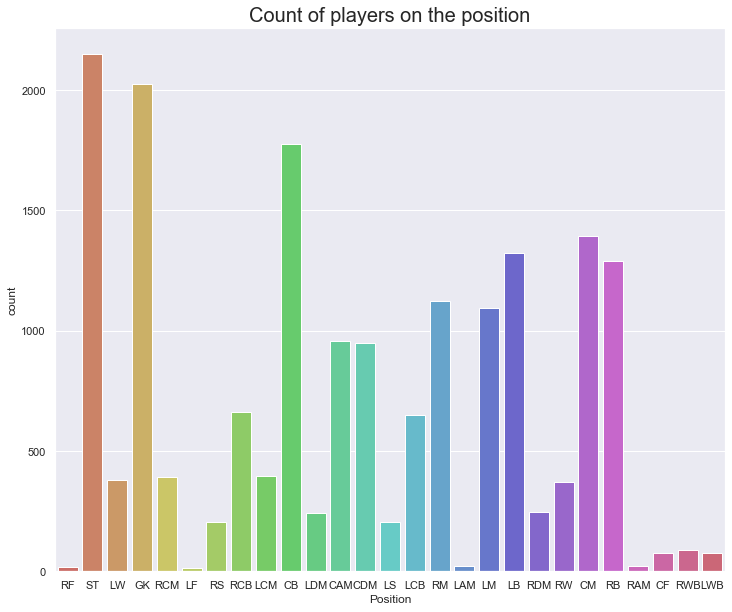

In [97]:
ax = sns.countplot(x = 'Position', data = data, palette = 'hls');
ax.set_title(label='Count of players on the position', fontsize=20);

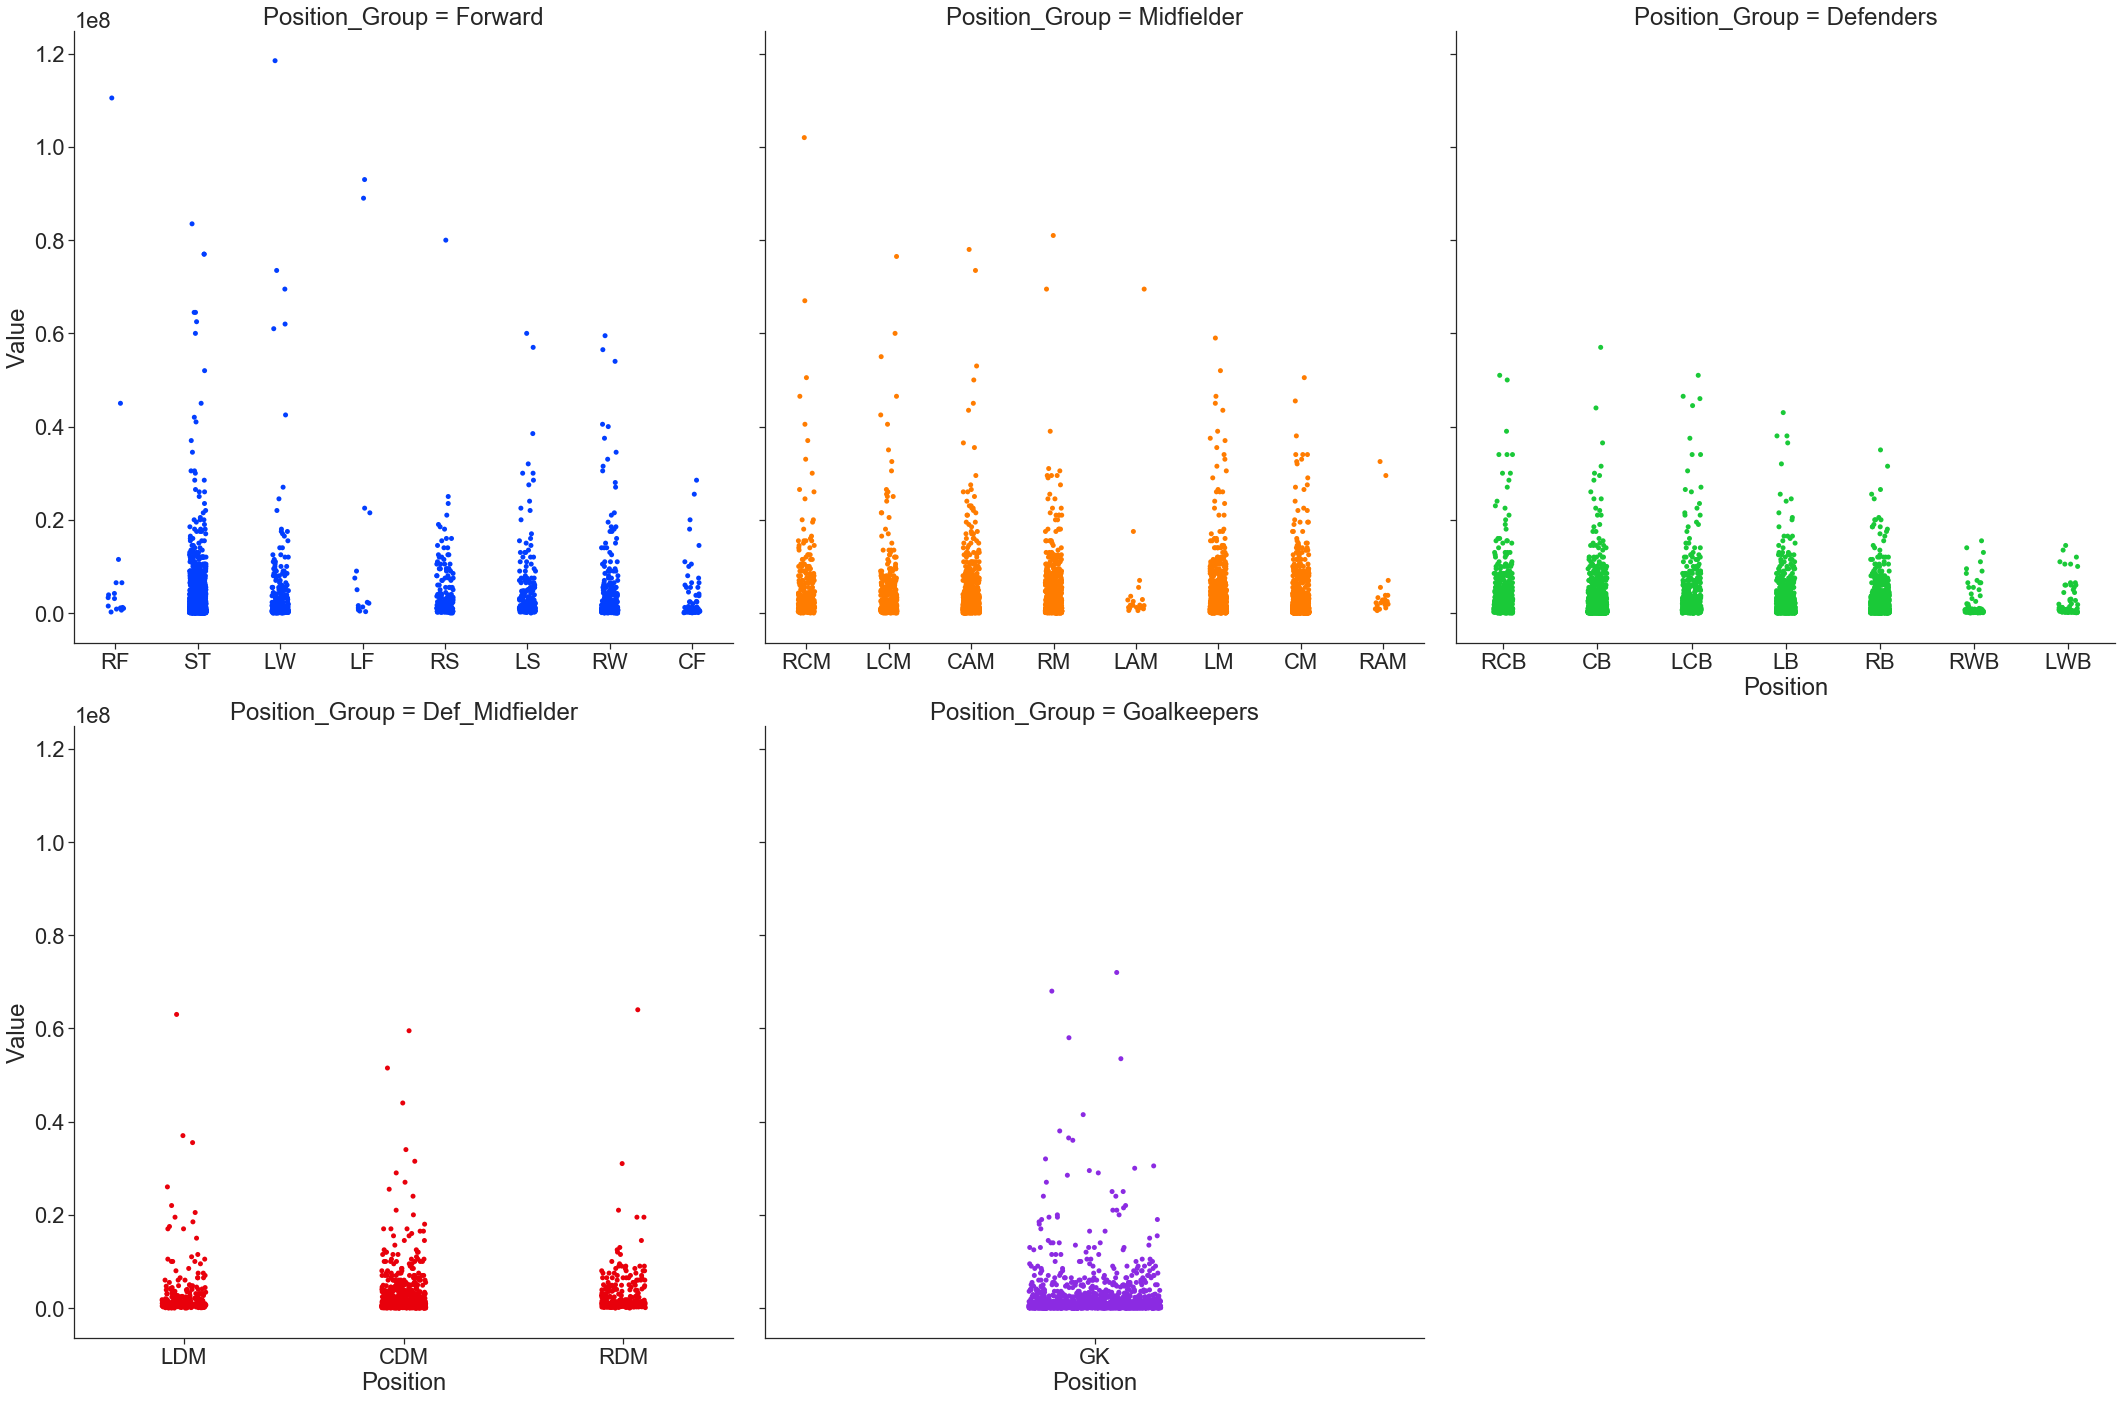

In [106]:
sns.set(font_scale=2, style ="ticks", palette = 'bright', color_codes=True, rc={"figure.figsize":(12,10)})

g = sns.FacetGrid(data, col="Position_Group", hue = 'Position_Group',
                  hue_order= ['Forward', 'Midfielder', 'Defenders','Def_Midfielder','Goalkeepers'],
                  col_order = ['Forward', 'Midfielder', 'Defenders','Def_Midfielder','Goalkeepers']
                  ,sharex=False, sharey=True, col_wrap=3, height=10)

g.map(sns.stripplot, 'Position' ,"Value" )

sns.set(font_scale=1, style ="ticks", palette = 'bright', color_codes=True)

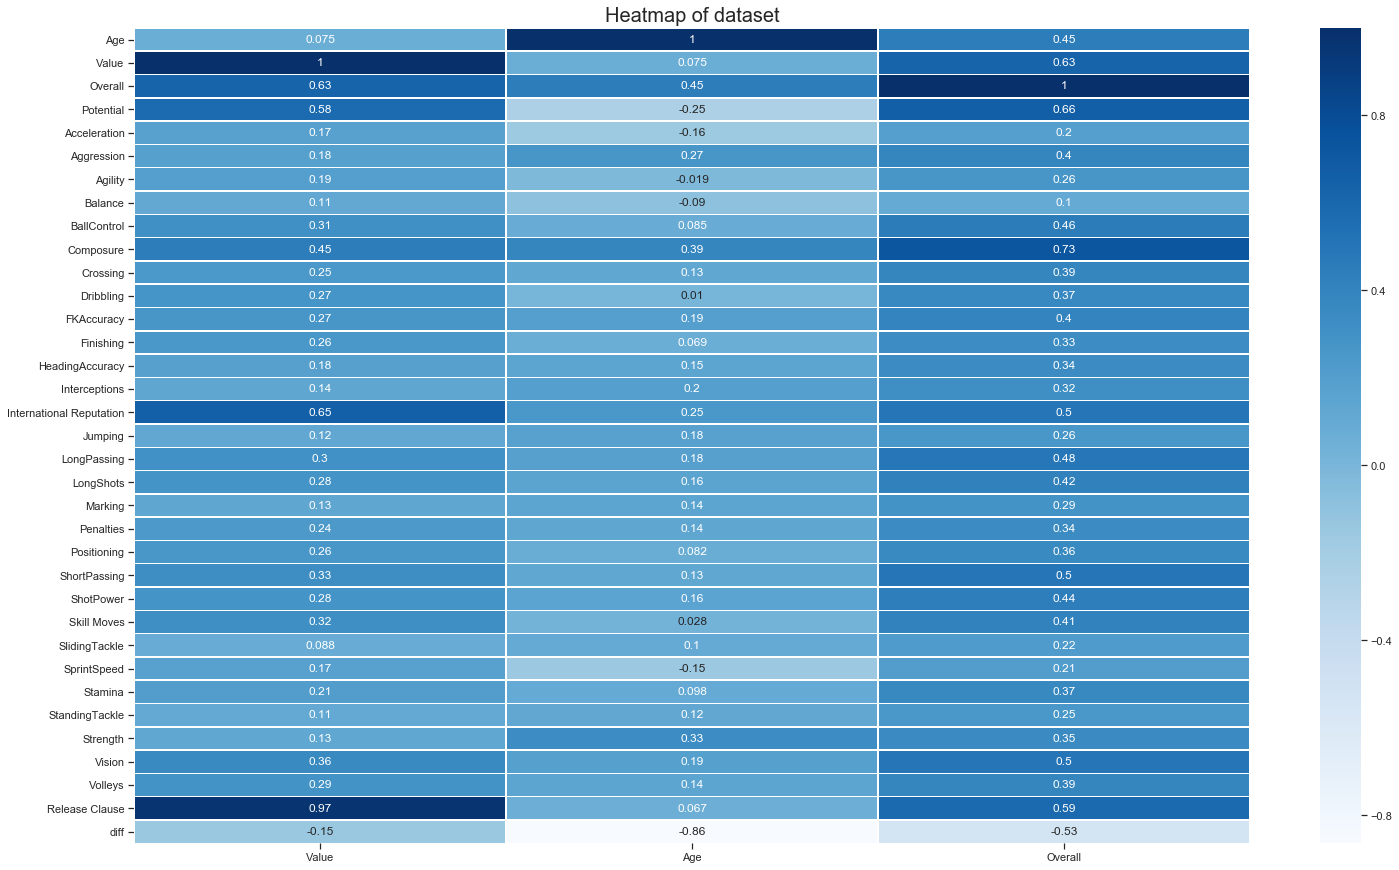

In [109]:
f, ax = plt.subplots(figsize=(25, 15))

hm=sns.heatmap(data[['Age', 'Value', 'Overall', 'Potential',
                'Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl', 
                'Composure', 'Crossing','Dribbling', 'FKAccuracy', 'Finishing', 
                'HeadingAccuracy', 'Interceptions','International Reputation',
                'Jumping', 'LongPassing', 'LongShots',
                'Marking', 'Penalties', 'Position', 'Positioning',
                'ShortPassing', 'ShotPower', 'Skill Moves', 'SlidingTackle',
                'SprintSpeed', 'Stamina', 'StandingTackle', 'Strength', 'Vision',
                'Volleys', 'Release Clause', 'diff']].corr()[['Value', 'Age', 'Overall']], annot = True, linewidths=.5, cmap='Blues')
hm.set_title(label='Heatmap of dataset', fontsize=20)
hm;